<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/ecc_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECC Modulus

### Slope

In [46]:
def mod_inverse(a, p):
    """Returns the modular inverse of a under modulo p using Fermat's Little Theorem."""
    return pow(a, p - 2, p)

def calculate_slope_mod(P, Q, p):
    x1, y1 = P
    x2, y2 = Q
    if x1 == x2 and y1 == y2:
        # Use the formula for point doubling when P == Q
        numerator = (3 * x1**2) % p
        denominator = (2 * y1) % p
    else:
        # Use the formula for regular slope when P != Q
        numerator = (y2 - y1) % p
        denominator = (x2 - x1) % p

    if denominator == 0:
        raise ValueError("Slope is undefined (denominator is zero).")

    # Compute the slope as (numerator / denominator) % p, which is
    # numerator * mod_inverse(denominator, p) % p
    slope = (numerator * mod_inverse(denominator, p)) % p
    return slope

## Point Multiplication Modulus

### Xr

In [47]:
def calculate_mul_xr_mod(P, Q, slope, p):
    x1, y1 = P
    x2, y2 = Q
    xr = (slope**2 - (2 * x1)) % p
    return xr

### Yr

In [48]:
def calculate_mul_yr_mod(P, Q, slope, xr, p):
    x1, y1 = P
    yr = (slope * (x1 - xr) - y1) % p
    return yr

### Example

In [117]:
# y^2 = x^3 + 7 mod 17
def curve_equation(x, a=0, b=7, p=17):
    """Elliptic curve equation y^2 = x^3 + ax + b mod p."""
    return (x**3 + a*x + b) % p

def is_curve_point(x, y, a=0, b=7, p=17):
    """Check if the point (x, y) satisfies the elliptic curve equation mod p."""
    return curve_equation(x, a, b, p) == (y**2) % p

In [118]:
P = (15, 13)
p = 17

def calculate_point_mul(P, p):
  print(f'P: {P}')
  print(f'p: {p}')

  m = calculate_slope_mod(P, P, p)
  print(f'slope: {m}')

  xr = calculate_mul_xr_mod(P, P, m, p)
  print(f'xr: {xr}')

  yr = calculate_mul_yr_mod(P, P, m, xr, p)
  print(f'yr: {yr}')

  R = (xr, yr)
  print(f'R: {R}')

  print(f'is R on curve: {is_curve_point(R[0], R[1], p)}')

  return R

R = calculate_point_mul(P, p)

P: (15, 13)
p: 17
slope: 7
xr: 2
yr: 10
R: (2, 10)
is R on curve: True


## Point Addition Modulus

### Xr

In [119]:
def calculate_add_xr_mod(P, Q, m, p):
    x1, y1 = P
    x2, y2 = Q
    xr = (m**2 - x1 - x2) % p
    return xr

### Yr

In [120]:
def calculate_add_yr_mod(P, Q, m, xr, p):
    x1, y1 = P
    x2, y2 = Q
    yr = (m * (x1 - xr) - y1) % p
    return yr

### Example

In [121]:
def calculate_point_add(P, Q, p):
  print(f'P: {P}')
  print(f'Q: {Q}')
  print(f'p: {p}')

  m = calculate_slope_mod(P, Q, p)
  print(f'slope: {m}')

  xr = calculate_add_xr_mod(P, Q, m, p)
  print(f'xr: {xr}')

  yr = calculate_add_yr_mod(P, Q, m, xr, p)
  print(f'yr: {yr}')

  R = (xr, yr)
  print(f'R: {R}')

  print(f'is R on curve: {is_curve_point(R[0], R[1], p)}')

  return R

S = calculate_point_add(P, R, p)

P: (15, 13)
Q: (2, 10)
p: 17
slope: 12
xr: 8
yr: 3
R: (8, 3)
is R on curve: True


In [122]:
T = calculate_point_add(P, S, p)

P: (15, 13)
Q: (8, 3)
p: 17
slope: 16
xr: 12
yr: 1
R: (12, 1)
is R on curve: True


In [123]:
U = calculate_point_add(P, T, p)

P: (15, 13)
Q: (12, 1)
p: 17
slope: 4
xr: 6
yr: 6
R: (6, 6)
is R on curve: True


In [124]:
V = calculate_poin_add(P, U, p)

P: (15, 13)
Q: (6, 6)
p: 17
slope: 14
xr: 5
yr: 8
R: (5, 8)
is R on curve: True


In [125]:
W = calculate_point_add(P, V, p)

P: (15, 13)
Q: (5, 8)
p: 17
slope: 9
xr: 10
yr: 15
R: (10, 15)
is R on curve: True


In [126]:
X = calculate_point_add(P, W, p)

P: (15, 13)
Q: (10, 15)
p: 17
slope: 3
xr: 1
yr: 12
R: (1, 12)
is R on curve: True


In [127]:
Y = calculate_point_add(P, X, p)

P: (15, 13)
Q: (1, 12)
p: 17
slope: 11
xr: 3
yr: 0
R: (3, 0)
is R on curve: True


In [128]:
Z = calculate_point_add(P, Y, p)

P: (15, 13)
Q: (3, 0)
p: 17
slope: 11
xr: 1
yr: 5
R: (1, 5)
is R on curve: True


In [129]:
A = calculate_point_add(P, Z, p)

P: (15, 13)
Q: (1, 5)
p: 17
slope: 3
xr: 10
yr: 2
R: (10, 2)
is R on curve: True


In [130]:
B = calculate_point_add(P, A, p)

P: (15, 13)
Q: (10, 2)
p: 17
slope: 9
xr: 5
yr: 9
R: (5, 9)
is R on curve: True


In [131]:
C = calculate_point_add(P, B, p)

P: (15, 13)
Q: (5, 9)
p: 17
slope: 14
xr: 6
yr: 11
R: (6, 11)
is R on curve: True


In [132]:
D = calculate_point_add(P, C, p)

P: (15, 13)
Q: (6, 11)
p: 17
slope: 4
xr: 12
yr: 16
R: (12, 16)
is R on curve: True


In [133]:
E = calculate_point_add(P, D, p)

P: (15, 13)
Q: (12, 16)
p: 17
slope: 16
xr: 8
yr: 14
R: (8, 14)
is R on curve: True


In [134]:
F = calculate_point_add(P, E, p)

P: (15, 13)
Q: (8, 14)
p: 17
slope: 12
xr: 2
yr: 7
R: (2, 7)
is R on curve: True


In [137]:
G = calculate_point_add(P, F, p)

P: (15, 13)
Q: (2, 7)
p: 17
slope: 7
xr: 15
yr: 4
R: (15, 4)
is R on curve: True


In [140]:
H = calculate_point_add(P, G, p) # already 17 steps

P: (15, 13)
Q: (15, 4)
p: 17


ValueError: Slope is undefined (denominator is zero).

# With Plotting

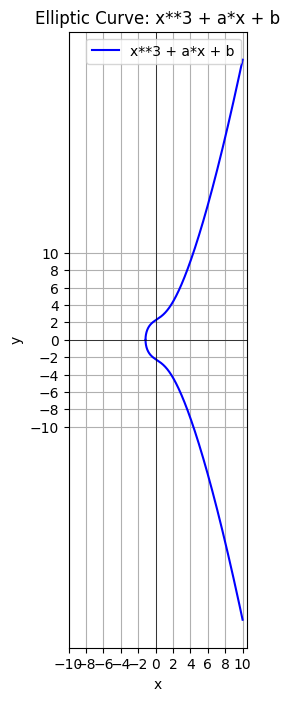

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a generalized elliptic curve with a callback equation
def plot_elliptic_curve(a, b, equation_callback, x_range=(-10, 10), num_points=100000, curve_label=None):
    """
    Plot an elliptic curve given an equation as a callback.

    Parameters:
    a (float): The 'a' coefficient to pass into the elliptic curve equation.
    b (float): The 'b' coefficient to pass into the elliptic curve equation.
    equation_callback (function): A callback function defining the elliptic curve equation.
    x_range (tuple): The range of x values for plotting (default is from -10 to 10).
    num_points (int): The number of points to plot (default is 100000).
    curve_label (str): A custom label for the curve plot (default uses the equation).
    """
    # Generate a set of x values for plotting the elliptic curve
    x = np.linspace(x_range[0], x_range[1], num_points)

    # Calculate the corresponding y^2 values using the provided callback function
    y_squared = equation_callback(x, a, b)

    # Mask values where y^2 is negative (because sqrt can't be applied to negative numbers)
    valid_mask = y_squared >= 0
    y_squared_valid = y_squared[valid_mask]
    x_valid = x[valid_mask]

    # Calculate y values (positive and negative branches) from valid y^2 values
    y_positive = np.sqrt(y_squared_valid)
    y_negative = -np.sqrt(y_squared_valid)

    # If no label is provided, use the default equation format in the label
    if curve_label is None:
        curve_label = rf'$y = \sqrt{{x^3 + {a}x + {b}}}$'

    # Plot the elliptic curve
    plt.figure(figsize=(8, 8))
    plt.plot(x_valid, y_positive, label=curve_label, color='blue')  # Upper half of the curve
    plt.plot(x_valid, y_negative, color='blue')  # Lower half of the curve

    # Set equal aspect ratio to ensure x and y scales are the same
    plt.gca().set_aspect('equal', adjustable='box')

    # Add labels, title, and grid
    plt.title(f"Elliptic Curve: {curve_label}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xticks(np.arange(-10, 11, 2))
    plt.yticks(np.arange(-10, 11, 2))
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

# Example callback function for the elliptic curve equation y^2 = x^3 + ax + b
def equation_elliptic_example(x, a, b):
    return x**3 + a*x + b

# Example usage with parameters a = 3, b = 5, and the equation callback
plot_elliptic_curve(a=3, b=5, equation_callback=equation_elliptic_example, curve_label='x**3 + a*x + b')

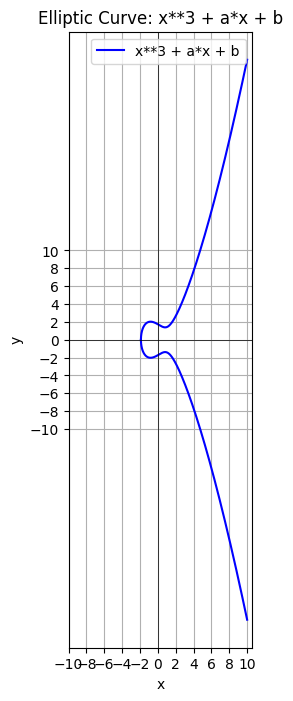

In [57]:
plot_elliptic_curve(a=-2, b=3, equation_callback=equation_elliptic_example, curve_label='x**3 + a*x + b')

# tinyec Library

In [59]:
!pip install tinyec

In [201]:
from tinyec.ec import SubGroup, Curve

field = SubGroup(p=17, g=(15, 13), n=18, h=1)
curve = Curve(a=0, b=7, field=field, name='p1707')
print('curve:', curve)

for k in range(0, 25):
    _p = k * curve.g
    print(f"{k} * G = ({_p.x}, {_p.y})")

curve: "p1707" => y^2 = x^3 + 0x + 7 (mod 17)
0 * G = (None, None)
1 * G = (15, 13)
2 * G = (2, 10)
3 * G = (8, 3)
4 * G = (12, 1)
5 * G = (6, 6)
6 * G = (5, 8)
7 * G = (10, 15)
8 * G = (1, 12)
9 * G = (3, 0)
10 * G = (1, 5)
11 * G = (10, 2)
12 * G = (5, 9)
13 * G = (6, 11)
14 * G = (12, 16)
15 * G = (8, 14)
16 * G = (2, 7)
17 * G = (15, 4)
18 * G = (None, None)
19 * G = (15, 13)
20 * G = (2, 10)
21 * G = (8, 3)
22 * G = (12, 1)
23 * G = (6, 6)
24 * G = (5, 8)


In [295]:
from tinyec.ec import SubGroup, Curve

field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p1707')
print('curve:', curve)

for k in range(0, 250):
    _p = k * curve.g
    print(f"{k} * G = ({_p.x}, {_p.y})")

curve: "p1707" => y^2 = x^3 + 0x + 7 (mod 233)
0 * G = (None, None)
1 * G = (15, 13)
2 * G = (26, 33)
3 * G = (22, 59)
4 * G = (68, 138)
5 * G = (169, 81)
6 * G = (87, 164)
7 * G = (30, 140)
8 * G = (65, 185)
9 * G = (179, 10)
10 * G = (76, 35)
11 * G = (206, 90)
12 * G = (216, 6)
13 * G = (0, 216)
14 * G = (222, 39)
15 * G = (230, 202)
16 * G = (40, 133)
17 * G = (229, 218)
18 * G = (199, 96)
19 * G = (139, 159)
20 * G = (139, 74)
21 * G = (199, 137)
22 * G = (229, 15)
23 * G = (40, 100)
24 * G = (230, 31)
25 * G = (222, 194)
26 * G = (0, 17)
27 * G = (216, 227)
28 * G = (206, 143)
29 * G = (76, 198)
30 * G = (179, 223)
31 * G = (65, 48)
32 * G = (30, 93)
33 * G = (87, 69)
34 * G = (169, 152)
35 * G = (68, 95)
36 * G = (22, 174)
37 * G = (26, 200)
38 * G = (15, 220)
39 * G = (None, None)
40 * G = (15, 13)
41 * G = (26, 33)
42 * G = (22, 59)
43 * G = (68, 138)
44 * G = (169, 81)
45 * G = (87, 164)
46 * G = (30, 140)
47 * G = (65, 185)
48 * G = (179, 10)
49 * G = (76, 35)
50 * G = (206,

/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (15, 13) is not on curve ""p1707" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (26, 33) is not on curve ""p1707" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (68, 138) is not on curve ""p1707" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (22, 59) is not on curve ""p1707" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: 

# Decryption

In [176]:
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field
field = SubGroup(p=17, g=(15, 13), n=18, h=1)
curve = Curve(a=0, b=7, field=field, name='p1707')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7
print(f"Private key: {priv_key}")

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Message point to encrypt (a point on the curve, chosen as an example)
message_point = 4 * curve.g  # Let's choose 4 * G = (12, 1)
print(f"Message point: ({message_point.x}, {message_point.y})")

# Encryption
# Random value for encryption
r = secrets.randbelow(curve.field.n)
C1 = r * curve.g  # Ephemeral public key
C2 = message_point + r * pub_key  # Ciphertext point

print(f"Ciphertext C1: ({C1.x}, {C1.y})")
print(f"Ciphertext C2: ({C2.x}, {C2.y})")

# Decryption using private key
decrypted_message = C2 - priv_key * C1
print(f"Decrypted message: ({decrypted_message.x}, {decrypted_message.y})")

Curve: "p1707" => y^2 = x^3 + 0x + 7 (mod 17)
Private key: 7
Public key: (10, 15)
Message point: (12, 1)
Ciphertext C1: (8, 14)
Ciphertext C2: (15, 13)
Decrypted message: (12, 1)


In [166]:
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field
field = SubGroup(p=17, g=(15, 13), n=18, h=1)
curve = Curve(a=0, b=7, field=field, name='p1707')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Message point to encrypt (a point on the curve, chosen as an example)
message_point = 4 * curve.g  # Let's choose 4 * G = (12, 1)
print(f"Message point: ({message_point.x}, {message_point.y})")

# Encryption
# Random value for encryption, avoiding y = 0 for C1
r = None
C1 = None
while True:
    r = secrets.randbelow(curve.field.n)
    C1 = r * curve.g
    if C1.y != 0:  # Ensure C1 is valid (not a problematic point)
        break

C2 = message_point + r * pub_key  # Ciphertext point

print(f"Ciphertext C1: ({C1.x}, {C1.y})")
print(f"Ciphertext C2: ({C2.x}, {C2.y})")

# Decryption using private key
decrypted_message = C2 - priv_key * C1
print(f"Decrypted message: ({decrypted_message.x}, {decrypted_message.y})")

Curve: "p1707" => y^2 = x^3 + 0x + 7 (mod 17)
Public key: (10, 15)
Message point: (12, 1)
Ciphertext C1: (None, None)
Ciphertext C2: (12, 1)


TypeError: unsupported operand type(s) for *: 'int' and 'Inf'

In [226]:
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field
field = SubGroup(p=17, g=(15, 13), n=18, h=1)
curve = Curve(a=0, b=7, field=field, name='p1707')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Message point to encrypt (a point on the curve, chosen as an example)
message_point = 4 * curve.g  # Let's choose 4 * G = (12, 1)
print(f"Message point: ({message_point.x}, {message_point.y})")

# Encryption
# Random value for encryption, avoiding point at infinity for C1
C1 = None
while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
    r = secrets.randbelow(curve.field.n)
    C1 = r * curve.g
    if C1.y != 0 or C1.y != None:  # Ensure C1 is valid (not a problematic point)
        break

C2 = message_point + r * pub_key  # Ciphertext point

print(f"Ciphertext C1: ({C1.x}, {C1.y})")
print(f"Ciphertext C2: ({C2.x}, {C2.y})")

# Decryption using private key
decrypted_message = C2 - priv_key * C1
print(f"Decrypted message: ({decrypted_message.x}, {decrypted_message.y})")


Curve: "p1707" => y^2 = x^3 + 0x + 7 (mod 17)
Public key: (10, 15)
Message point: (12, 1)
Ciphertext C1: (2, 10)
Ciphertext C2: (None, None)
Decrypted message: (12, 16)


In [212]:
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field
field = SubGroup(p=17, g=(15, 13), n=18, h=1)
curve = Curve(a=0, b=7, field=field, name='p1707')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a number to a point on the curve
def map_number_to_curve(number, curve):
    # Try to find a valid point on the curve with x = number, y calculated
    for x in range(number, number + 100):  # Small range to find a valid point
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:
            return ec.Point(curve, x, y)
    raise ValueError(f"No valid point found for number {number}")

# Message to encrypt: "helo"
message = "helo"

# Convert each character to its ASCII number
ascii_values = [ord(char) for char in message]
print(f"ASCII values: {ascii_values}")

# Encrypt each ASCII value
ciphertexts = []
for number in ascii_values:
    # Map the ASCII number to a point on the curve
    point = map_number_to_curve(number, curve)
    print(f"Mapped point for {number}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

# Decrypt the ciphertexts
for C1, C2 in ciphertexts:
    decrypted_point = C2 - priv_key * C1
    print(f"Decrypted point: ({decrypted_point.x}, {decrypted_point.y})")
    decrypted_char = chr(decrypted_point.x)  # Recover original ASCII from x-coordinate
    print(f"Decrypted character: {decrypted_char}")

Curve: "p1707" => y^2 = x^3 + 0x + 7 (mod 17)
Public key: (10, 15)
ASCII values: [104, 101, 108, 111]
Mapped point for 104: (105, 0)
Ciphertext for 104: C1=(6, 6), C2=(1, 12)
Mapped point for 101: (105, 0)
Ciphertext for 101: C1=(6, 11), C2=(1, 5)
Mapped point for 108: (114, 1)
Ciphertext for 108: C1=(12, 16), C2=(5, 9)
Mapped point for 111: (114, 1)
Ciphertext for 111: C1=(8, 14), C2=(15, 13)
Decrypted point: (3, 0)
Decrypted character: 
Decrypted point: (3, 0)
Decrypted character: 
Decrypted point: (12, 1)
Decrypted character: 
Decrypted point: (12, 1)
Decrypted character: 


In [215]:
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field
field = SubGroup(p=17, g=(15, 13), n=18, h=1)
curve = Curve(a=0, b=7, field=field, name='p1707')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a number to a point on the curve
def map_number_to_curve(number, curve):
    # Try to find a valid point on the curve with x = number, y calculated
    for x in range(number, number + 100):  # Small range to find a valid point
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:
            return ec.Point(curve, x, y)
    raise ValueError(f"No valid point found for number {number}")

# Function to map a point on the curve back to a number (using x-coordinate)
def map_curve_to_number(point):
    return point.x

# Message to encrypt: "helo"
message = "helo"

# Convert each character to its ASCII number
ascii_values = [ord(char) for char in message]
print(f"ASCII values: {ascii_values}")

# Encrypt each ASCII value
ciphertexts = []
for number in ascii_values:
    # Map the ASCII number to a point on the curve
    point = map_number_to_curve(number, curve)
    print(f"Mapped point for {number}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

print(ciphertexts)
# Decrypt the ciphertexts
for C1, C2 in ciphertexts:
    decrypted_point = C2 - priv_key * C1
    decrypted_number = map_curve_to_number(decrypted_point)  # Get the x-coordinate
    decrypted_char = chr(decrypted_number % 128)  # Ensure it maps to a valid ASCII char
    print(f"Decrypted character: {decrypted_char}")

Curve: "p1707" => y^2 = x^3 + 0x + 7 (mod 17)
Public key: (10, 15)
ASCII values: [104, 101, 108, 111]
Mapped point for 104: (105, 0)
Ciphertext for 104: C1=(2, 7), C2=(6, 11)
Mapped point for 101: (105, 0)
Ciphertext for 101: C1=(2, 10), C2=(6, 6)
Mapped point for 108: (114, 1)
Ciphertext for 108: C1=(5, 9), C2=(2, 7)
Mapped point for 111: (114, 1)
Ciphertext for 111: C1=(1, 12), C2=(5, 8)
[((2, 7) on "p1707" => y^2 = x^3 + 0x + 7 (mod 17), (6, 11) on "p1707" => y^2 = x^3 + 0x + 7 (mod 17)), ((2, 10) on "p1707" => y^2 = x^3 + 0x + 7 (mod 17), (6, 6) on "p1707" => y^2 = x^3 + 0x + 7 (mod 17)), ((5, 9) on "p1707" => y^2 = x^3 + 0x + 7 (mod 17), (2, 7) on "p1707" => y^2 = x^3 + 0x + 7 (mod 17)), ((1, 12) on "p1707" => y^2 = x^3 + 0x + 7 (mod 17), (5, 8) on "p1707" => y^2 = x^3 + 0x + 7 (mod 17))]
Decrypted character: 
Decrypted character: 
Decrypted character: 
Decrypted character: 


In [237]:
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field with a larger prime field for better representation of Unicode values
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    # Try to find a valid point on the curve with x = number, y calculated
    for x in range(number, number + 100):  # Small range to find a valid point
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:
            return ec.Point(curve, x, y)
    raise ValueError(f"No valid point found for number {number}")

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point):
    return point.x

# Message to encrypt: "hello"
message = "hello"

# Convert each character to its Unicode number
unicode_values = [ord(char) for char in message]
print(f"Unicode values: {unicode_values}")

# Encrypt each Unicode value
ciphertexts = []
for number in unicode_values:
    # Map the Unicode number to a point on the curve
    point = map_number_to_curve(number, curve)
    print(f"Mapped point for {number}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

# Decrypt the ciphertexts
decrypted_message = []
decrypted_ascii_values = []
for C1, C2 in ciphertexts:
    decrypted_point = C2 - priv_key * C1
    decrypted_number = map_curve_to_number(decrypted_point)  # Get the x-coordinate
    decrypted_ascii_values.append(decrypted_number)
    decrypted_char = chr(decrypted_number % 128)  # Ensure valid ASCII character
    decrypted_message.append(decrypted_char)
    print(f"Decrypted ASCII: {decrypted_number}, Decrypted character: {decrypted_char}")

# Print the final decrypted message
print(f"Decrypted message: {''.join(decrypted_message)}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Unicode values: [104, 101, 108, 108, 111]


ValueError: No valid point found for number 104

In [243]:
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field with a larger prime field for better representation of Unicode values
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    # Try to find a valid point on the curve with x = number, y calculated
    offset = 0  # Keep track of the offset we apply to find a valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:
            return ec.Point(curve, x, y), offset
        offset += 1  # Try the next value of x if the current one doesn't work

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Message to encrypt: "hello"
message = "hello"

# Convert each character to its Unicode number
unicode_values = [ord(char) for char in message]
print(f"Unicode values: {unicode_values}")

# Encrypt each Unicode value
ciphertexts = []
offsets = []
for number in unicode_values:
    # Map the Unicode number to a point on the curve, handle offset
    point, offset = map_number_to_curve(number, curve)
    offsets.append(offset)  # Store the offset for decryption
    print(f"Mapped point for {number} with offset {offset}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

# Decrypt the ciphertexts
decrypted_message = []
decrypted_ascii_values = []
for i, (C1, C2) in enumerate(ciphertexts):
    decrypted_point = C2 - priv_key * C1
    decrypted_number = map_curve_to_number(decrypted_point, offsets[i])  # Get the original number by subtracting offset
    decrypted_ascii_values.append(decrypted_number)
    decrypted_char = chr(decrypted_number % 128)  # Ensure valid ASCII character
    decrypted_message.append(decrypted_char)
    print(f"Decrypted ASCII: {decrypted_number}, Decrypted character: {decrypted_char}")

# Print the final decrypted message
print(f"Decrypted message: {''.join(decrypted_message)}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Unicode values: [104, 101, 108, 108, 111]
Mapped point for 104 with offset 111: (215, 0)
Ciphertext for 104: C1=(40, 133), C2=(133, 114)
Mapped point for 101 with offset 114: (215, 0)
Ciphertext for 101: C1=(0, 216), C2=(162, 170)
Mapped point for 108 with offset 107: (215, 0)
Ciphertext for 108: C1=(0, 17), C2=(162, 63)
Mapped point for 108 with offset 107: (215, 0)
Ciphertext for 108: C1=(179, 10), C2=(163, 123)
Mapped point for 111 with offset 104: (215, 0)
Ciphertext for 111: C1=(169, 152), C2=(52, 99)
Decrypted ASCII: 104, Decrypted character: h
Decrypted ASCII: 101, Decrypted character: e
Decrypted ASCII: 108, Decrypted character: l
Decrypted ASCII: 108, Decrypted character: l
Decrypted ASCII: 111, Decrypted character: o
Decrypted message: hello
Decrypted ASCII values: [104, 101, 108, 108, 111]


/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (163, 123) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (52, 99) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))


In [248]:
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation
import warnings

# Define the elliptic curve and field with a larger prime field for better representation of Unicode values
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    offset = 0  # Keep track of the offset we apply to find a valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:  # Ensure it's a valid point
            try:
                point = ec.Point(curve, x, y)
                return point, offset  # If the point is valid, return it
            except ValueError:
                pass  # Skip invalid points if ValueError is raised
        offset += 1  # Try the next value of x if the current one doesn't work

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Message to encrypt: "hello"
message = "hello"

# Convert each character to its Unicode number
unicode_values = [ord(char) for char in message]
print(f"Unicode values: {unicode_values}")

# Encrypt each Unicode value
ciphertexts = []
offsets = []
for number in unicode_values:
    # Map the Unicode number to a point on the curve, handle offset
    point, offset = map_number_to_curve(number, curve)
    offsets.append(offset)  # Store the offset for decryption
    print(f"Mapped point for {number} with offset {offset}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

cipherArray = np.array(ciphertexts)
print(cipherArray)

# Decrypt the ciphertexts
decrypted_message = []
decrypted_ascii_values = []
for i, (C1, C2) in enumerate(ciphertexts):
    decrypted_point = C2 - priv_key * C1
    decrypted_number = map_curve_to_number(decrypted_point, offsets[i])  # Get the original number by subtracting offset
    decrypted_ascii_values.append(decrypted_number)
    decrypted_char = chr(decrypted_number % 128)  # Ensure valid ASCII character
    decrypted_message.append(decrypted_char)
    print(f"Decrypted ASCII: {decrypted_number}, Decrypted character: {decrypted_char}")

# Print the final decrypted message
print(f"Decrypted message: {''.join(decrypted_message)}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Unicode values: [104, 101, 108, 108, 111]
Mapped point for 104 with offset 111: (215, 0)
Ciphertext for 104: C1=(230, 31), C2=(71, 165)
Mapped point for 101 with offset 114: (215, 0)
Ciphertext for 101: C1=(139, 74), C2=(140, 57)
Mapped point for 108 with offset 107: (215, 0)
Ciphertext for 108: C1=(87, 69), C2=(19, 107)
Mapped point for 108 with offset 107: (215, 0)
Ciphertext for 108: C1=(229, 218), C2=(211, 3)
Mapped point for 111 with offset 104: (215, 0)
Ciphertext for 111: C1=(87, 164), C2=(19, 126)
[[(230, 31) off "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
  (71, 165) off "p23307" => y^2 = x^3 + 0x + 7 (mod 233)]
 [(139, 74) off "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
  (140, 57) off "p23307" => y^2 = x^3 + 0x + 7 (mod 233)]
 [(87, 69) off "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
  (19, 107) off "p23307" => y^2 = x^3 + 0x + 7 (mod 233)]
 [(229, 218) off "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
  (211, 3) off "p

/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (15, 13) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (26, 33) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (22, 59) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (68, 138) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarni

In [249]:
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation
import warnings

# Define the elliptic curve and field with a larger prime field for better representation of Unicode values
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    offset = 0  # Keep track of the offset we apply to find a valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:  # Ensure it's a valid point
            try:
                point = ec.Point(curve, x, y)
                return point, offset  # If the point is valid, return it
            except ValueError:
                pass  # Skip invalid points if ValueError is raised
        offset += 1  # Try the next value of x if the current one doesn't work

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Message to encrypt: "hello"
message = "loremipsumdolorres"

# Convert each character to its Unicode number
unicode_values = [ord(char) for char in message]
print(f"Unicode values: {unicode_values}")

# Encrypt each Unicode value
ciphertexts = []
offsets = []
for number in unicode_values:
    # Map the Unicode number to a point on the curve, handle offset
    point, offset = map_number_to_curve(number, curve)
    offsets.append(offset)  # Store the offset for decryption
    print(f"Mapped point for {number} with offset {offset}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

cipherArray = np.array(ciphertexts)
print(cipherArray)

# Decrypt the ciphertexts
decrypted_message = []
decrypted_ascii_values = []
for i, (C1, C2) in enumerate(ciphertexts):
    decrypted_point = C2 - priv_key * C1
    decrypted_number = map_curve_to_number(decrypted_point, offsets[i])  # Get the original number by subtracting offset
    decrypted_ascii_values.append(decrypted_number)
    decrypted_char = chr(decrypted_number % 128)  # Ensure valid ASCII character
    decrypted_message.append(decrypted_char)
    print(f"Decrypted ASCII: {decrypted_number}, Decrypted character: {decrypted_char}")

# Print the final decrypted message
print(f"Decrypted message: {''.join(decrypted_message)}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Unicode values: [108, 111, 114, 101, 109, 105, 112, 115, 117, 109, 100, 111, 108, 111, 114, 114, 101, 115]
Mapped point for 108 with offset 107: (215, 0)
Ciphertext for 108: C1=(169, 152), C2=(52, 99)
Mapped point for 111 with offset 104: (215, 0)
Ciphertext for 111: C1=(199, 137), C2=(103, 57)
Mapped point for 114 with offset 101: (215, 0)
Ciphertext for 114: C1=(68, 138), C2=(145, 1)
Mapped point for 101 with offset 114: (215, 0)
Ciphertext for 101: C1=(65, 48), C2=(60, 216)
Mapped point for 109 with offset 106: (215, 0)
Ciphertext for 109: C1=(222, 39), C2=(5, 4)
Mapped point for 105 with offset 110: (215, 0)
Ciphertext for 105: C1=(222, 194), C2=(5, 229)
Mapped point for 112 with offset 103: (215, 0)
Ciphertext for 112: C1=(22, 59), C2=(88, 63)
Mapped point for 115 with offset 100: (215, 0)
Ciphertext for 115: C1=(222, 39), C2=(5, 4)
Mapped point for 117 with offset 98: (215, 0)
Ciphertext for 117: C1=(15, 220), 

/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (52, 99) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (103, 57) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (145, 1) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (65, 48) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarni

In [250]:
import numpy as np
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation
import warnings

# Define the elliptic curve and field with a larger prime field for better representation of Unicode values
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    offset = 0  # Keep track of the offset we apply to find a valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:  # Ensure it's a valid point
            try:
                point = ec.Point(curve, x, y)
                return point, offset  # If the point is valid, return it
            except ValueError:
                pass  # Skip invalid points if ValueError is raised
        offset += 1  # Try the next value of x if the current one doesn't work

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Message to encrypt
message = "loremipsumdolorres"

# Convert each character to its Unicode number
unicode_values = [ord(char) for char in message]
print(f"Unicode values: {unicode_values}")

# Encrypt each Unicode value
ciphertexts = []
offsets = []
ciphertext_ascii = []

for number in unicode_values:
    # Map the Unicode number to a point on the curve, handle offset
    point, offset = map_number_to_curve(number, curve)
    offsets.append(offset)  # Store the offset for decryption
    print(f"Mapped point for {number} with offset {offset}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    # Store ASCII values of C1 and C2.x
    ciphertext_ascii.append((C1.x % 128, C2.x % 128))  # Convert x-coordinates of C1, C2 to ASCII range
    print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

# Convert ciphertexts to array for easier viewing
cipherArray = np.array(ciphertexts)
print(f"Ciphertext array: {cipherArray}")

# Print ciphertext ASCII values
print("Ciphertext ASCII values (x-coordinates of C1, C2):")
for c1_ascii, c2_ascii in ciphertext_ascii:
    print(f"C1 ASCII: {c1_ascii}, C2 ASCII: {c2_ascii}")

# Decrypt the ciphertexts
decrypted_message = []
decrypted_ascii_values = []
for i, (C1, C2) in enumerate(ciphertexts):
    decrypted_point = C2 - priv_key * C1
    decrypted_number = map_curve_to_number(decrypted_point, offsets[i])  # Get the original number by subtracting offset
    decrypted_ascii_values.append(decrypted_number)
    decrypted_char = chr(decrypted_number % 128)  # Ensure valid ASCII character
    decrypted_message.append(decrypted_char)
    print(f"Decrypted ASCII: {decrypted_number}, Decrypted character: {decrypted_char}")

# Print the final decrypted message
print(f"Decrypted message: {''.join(decrypted_message)}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Unicode values: [108, 111, 114, 101, 109, 105, 112, 115, 117, 109, 100, 111, 108, 111, 114, 114, 101, 115]
Mapped point for 108 with offset 107: (215, 0)
Ciphertext for 108: C1=(0, 216), C2=(162, 170)
Mapped point for 111 with offset 104: (215, 0)
Ciphertext for 111: C1=(139, 159), C2=(140, 176)
Mapped point for 114 with offset 101: (215, 0)
Ciphertext for 114: C1=(229, 15), C2=(211, 230)
Mapped point for 101 with offset 114: (215, 0)
Ciphertext for 101: C1=(26, 33), C2=(22, 110)
Mapped point for 109 with offset 106: (215, 0)
Ciphertext for 109: C1=(216, 6), C2=(200, 90)
Mapped point for 105 with offset 110: (215, 0)
Ciphertext for 105: C1=(87, 69), C2=(19, 107)
Mapped point for 112 with offset 103: (215, 0)
Ciphertext for 112: C1=(139, 159), C2=(140, 176)
Mapped point for 115 with offset 100: (215, 0)
Ciphertext for 115: C1=(26, 200), C2=(22, 123)
Mapped point for 117 with offset 98: (215, 0)
Ciphertext for 117: C1=

/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (162, 170) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (140, 176) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (211, 230) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (22, 110) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: Use

In [251]:
import numpy as np
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation
import warnings

# Define the elliptic curve and field with a larger prime field for better representation of Unicode values
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    offset = 0  # Keep track of the offset we apply to find a valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:  # Ensure it's a valid point
            try:
                point = ec.Point(curve, x, y)
                return point, offset  # If the point is valid, return it
            except ValueError:
                pass  # Skip invalid points if ValueError is raised
        offset += 1  # Try the next value of x if the current one doesn't work

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Message to encrypt
message = "loremipsumdolorres"

# Convert each character to its Unicode number
unicode_values = [ord(char) for char in message]
print(f"Unicode values: {unicode_values}")

# Encrypt each Unicode value
ciphertexts = []
offsets = []
ciphertext_ascii = []

for number in unicode_values:
    # Map the Unicode number to a point on the curve, handle offset
    point, offset = map_number_to_curve(number, curve)
    offsets.append(offset)  # Store the offset for decryption
    print(f"Mapped point for {number} with offset {offset}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    # Store ASCII values of C1 and C2.x
    ciphertext_ascii.append((C1.x % 128, C2.x % 128))  # Convert x-coordinates of C1, C2 to ASCII range
    print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

# Convert ciphertexts to array for easier viewing
cipherArray = np.array(ciphertexts)
print(f"Ciphertext array: {cipherArray}")

# Save ASCII values to one list
ascii_list = []
print("Ciphertext ASCII values (x-coordinates of C1, C2):")
for c1_ascii, c2_ascii in ciphertext_ascii:
    ascii_list.append(c1_ascii)
    ascii_list.append(c2_ascii)
    print(f"C1 ASCII: {c1_ascii}, C2 ASCII: {c2_ascii}")

# Convert ASCII list to a string
ascii_string = ''.join(chr(val) for val in ascii_list)
print(f"Ciphertext ASCII string: {ascii_string}")

# Decrypt the ciphertexts
decrypted_message = []
decrypted_ascii_values = []
for i, (C1, C2) in enumerate(ciphertexts):
    decrypted_point = C2 - priv_key * C1
    decrypted_number = map_curve_to_number(decrypted_point, offsets[i])  # Get the original number by subtracting offset
    decrypted_ascii_values.append(decrypted_number)
    decrypted_char = chr(decrypted_number % 128)  # Ensure valid ASCII character
    decrypted_message.append(decrypted_char)
    print(f"Decrypted ASCII: {decrypted_number}, Decrypted character: {decrypted_char}")

# Print the final decrypted message
print(f"Decrypted message: {''.join(decrypted_message)}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Unicode values: [108, 111, 114, 101, 109, 105, 112, 115, 117, 109, 100, 111, 108, 111, 114, 114, 101, 115]
Mapped point for 108 with offset 107: (215, 0)
Ciphertext for 108: C1=(206, 90), C2=(151, 116)
Mapped point for 111 with offset 104: (215, 0)
Ciphertext for 111: C1=(199, 137), C2=(103, 57)
Mapped point for 114 with offset 101: (215, 0)
Ciphertext for 114: C1=(0, 17), C2=(162, 63)
Mapped point for 101 with offset 114: (215, 0)
Ciphertext for 101: C1=(26, 33), C2=(22, 110)
Mapped point for 109 with offset 106: (215, 0)
Ciphertext for 109: C1=(222, 39), C2=(5, 4)
Mapped point for 105 with offset 110: (215, 0)
Ciphertext for 105: C1=(26, 200), C2=(22, 123)
Mapped point for 112 with offset 103: (215, 0)
Ciphertext for 112: C1=(22, 59), C2=(88, 63)
Mapped point for 115 with offset 100: (215, 0)
Ciphertext for 115: C1=(87, 69), C2=(19, 107)
Mapped point for 117 with offset 98: (215, 0)
Ciphertext for 117: C1=(216, 227

/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (162, 63) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (200, 143) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (103, 176) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (60, 17) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))


In [254]:
import numpy as np
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation
import warnings

# Define the elliptic curve and field with a larger prime field for better representation of Unicode values
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    offset = 0  # Keep track of the offset we apply to find a valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:  # Ensure it's a valid point
            try:
                point = ec.Point(curve, x, y)
                return point, offset  # If the point is valid, return it
            except ValueError:
                pass  # Skip invalid points if ValueError is raised
        offset += 1  # Try the next value of x if the current one doesn't work

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Message to encrypt
message = "loremipsumdolorres"

# Convert each character to its Unicode number
unicode_values = [ord(char) for char in message]
print(f"Unicode values: {unicode_values}")

# Encrypt each Unicode value
ciphertexts = []
offsets = []
ciphertext_hex = []  # Store ciphertexts in hexadecimal

for number in unicode_values:
    # Map the Unicode number to a point on the curve, handle offset
    point, offset = map_number_to_curve(number, curve)
    offsets.append(offset)  # Store the offset for decryption
    print(f"Mapped point for {number} with offset {offset}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    # Store hexadecimal values of C1 and C2.x
    ciphertext_hex.append((hex(C1.x), hex(C2.x)))  # Convert x-coordinates of C1, C2 to hex
    print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

# Convert ciphertexts to array for easier viewing
cipherArray = np.array(ciphertexts)
print(f"Ciphertext array: {cipherArray}")

# Save hex values to one list
hex_list = []
print("Ciphertext hexadecimal values (x-coordinates of C1, C2):")
for c1_hex, c2_hex in ciphertext_hex:
    hex_list.append(c1_hex)
    hex_list.append(c2_hex)
    print(f"C1 Hex: {c1_hex}, C2 Hex: {c2_hex}")

# Convert hex list to a string (concatenation of all hex values)
hex_string = ''.join(hex_val[2:] for hex_val in hex_list)  # Remove '0x' prefix from hex values
print(f"Ciphertext Hexadecimal string: {hex_string}")

# Decrypt the ciphertexts
decrypted_message = []
decrypted_ascii_values = []
for i, (C1, C2) in enumerate(ciphertexts):
    decrypted_point = C2 - priv_key * C1
    decrypted_number = map_curve_to_number(decrypted_point, offsets[i])  # Get the original number by subtracting offset
    decrypted_ascii_values.append(decrypted_number)
    decrypted_char = chr(decrypted_number % 128)  # Ensure valid ASCII character
    decrypted_message.append(decrypted_char)
    print(f"Decrypted ASCII: {decrypted_number}, Decrypted character: {decrypted_char}")

# Print the final decrypted message
print(f"Decrypted message: {''.join(decrypted_message)}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Unicode values: [108, 111, 114, 101, 109, 105, 112, 115, 117, 109, 100, 111, 108, 111, 114, 114, 101, 115]
Mapped point for 108 with offset 107: (215, 0)
Ciphertext for 108: C1=(222, 39), C2=(5, 4)
Mapped point for 111 with offset 104: (215, 0)
Ciphertext for 111: C1=(68, 95), C2=(145, 232)
Mapped point for 114 with offset 101: (215, 0)
Ciphertext for 114: C1=(76, 198), C2=(34, 2)
Mapped point for 101 with offset 114: (215, 0)
Ciphertext for 101: C1=(26, 33), C2=(22, 110)
Mapped point for 109 with offset 106: (215, 0)
Ciphertext for 109: C1=(0, 216), C2=(162, 170)
Mapped point for 105 with offset 110: (215, 0)
Ciphertext for 105: C1=(15, 220), C2=(202, 98)
Mapped point for 112 with offset 103: (215, 0)
Ciphertext for 112: C1=(230, 202), C2=(71, 68)
Mapped point for 115 with offset 100: (215, 0)
Ciphertext for 115: C1=(65, 48), C2=(60, 216)
Mapped point for 117 with offset 98: (215, 0)
Ciphertext for 117: C1=(216, 6),

/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (145, 232) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (22, 110) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (162, 170) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (71, 68) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserW

In [273]:
import numpy as np
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation
import warnings

# Define the elliptic curve and field with a larger prime field for better representation of Unicode values
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key of recipient (your private key)
priv_key = 7

# Public key of recipient (this is your public key)
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    offset = 0  # Keep track of the offset we apply to find a valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p  # Right hand side of the curve equation
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)  # Find square root mod p
        if (y * y) % curve.field.p == rhs:  # Ensure it's a valid point
            try:
                point = ec.Point(curve, x, y)
                return point, offset  # If the point is valid, return it
            except ValueError:
                pass  # Skip invalid points if ValueError is raised
        offset += 1  # Try the next value of x if the current one doesn't work

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Message to encrypt
message = "loremipsumdolorres"

# Convert each character to its Unicode number
unicode_values = [ord(char) for char in message]
print(f"Unicode values: {unicode_values}")

# Encrypt each Unicode value
ciphertexts = []
offsets = []
ciphertext_hex = []  # Store ciphertexts in hexadecimal

for number in unicode_values:
    # Map the Unicode number to a point on the curve, handle offset
    point, offset = map_number_to_curve(number, curve)
    offsets.append(offset)  # Store the offset for decryption
    # print(f"Mapped point for {number} with offset {offset}: ({point.x}, {point.y})")

    # Encryption
    C1 = None
    while C1 is None or C1.x is None:  # Keep generating until we get a valid C1
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g

    C2 = point + r * pub_key  # Ciphertext point
    ciphertexts.append((C1, C2))
    # Store hexadecimal values of C1 and C2.x
    ciphertext_hex.append((hex(C1.x), hex(C2.x)))  # Convert x-coordinates of C1, C2 to hex
    # print(f"Ciphertext for {number}: C1=({C1.x}, {C1.y}), C2=({C2.x}, {C2.y})")

# Convert ciphertexts to array for easier viewing
# cipherArray = np.array(ciphertexts)
# print(f"Ciphertext array: {cipherArray}")

ascii_list = []
print("Ciphertext ASCII values (x-coordinates of C1, C2):")
for c1_ascii, c2_ascii in ciphertext_ascii:
    ascii_list.append(c1_ascii)
    ascii_list.append(c2_ascii)
    print(f"C1 ASCII: {c1_ascii}, C2 ASCII: {c2_ascii}")

print(ascii_list)

ascii_string = ''.join(chr(val) for val in ascii_list)
print(f"Ciphertext ASCII string: {ascii_string}")

# Save hex values to one list
hex_list = []
print("Ciphertext hexadecimal values (x-coordinates of C1, C2):")
for c1_hex, c2_hex in ciphertext_hex:
    hex_list.append(c1_hex)
    hex_list.append(c2_hex)
    # print(f"C1 Hex: {c1_hex}, C2 Hex: {c2_hex}")

print(hex_list)

# Convert hex list to a string (concatenation of all hex values)
hex_string = ''.join(hex_val[2:] for hex_val in hex_list)  # Remove '0x' prefix from hex values
print(f"Ciphertext Hexadecimal string: {hex_string}")

print(f'offsets {offsets}')
# Decrypt the ciphertexts
decrypted_message = []
decrypted_ascii_values = []
for i, (C1, C2) in enumerate(ciphertexts):
    decrypted_point = C2 - priv_key * C1
    decrypted_number = map_curve_to_number(decrypted_point, offsets[i])  # Get the original number by subtracting offset
    decrypted_ascii_values.append(decrypted_number)
    decrypted_char = chr(decrypted_number % 128)  # Ensure valid ASCII character
    decrypted_message.append(decrypted_char)
    print(f"Decrypted ASCII: {decrypted_number}, Decrypted character: {decrypted_char}")

# Print the final decrypted message
print(f"Decrypted message: {''.join(decrypted_message)}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Unicode values: [108, 111, 114, 101, 109, 105, 112, 115, 117, 109, 100, 111, 108, 111, 114, 114, 101, 115]
Ciphertext ASCII values (x-coordinates of C1, C2):
C1 ASCII: 78, C2 ASCII: 23
C1 ASCII: 71, C2 ASCII: 103
C1 ASCII: 0, C2 ASCII: 34
C1 ASCII: 26, C2 ASCII: 22
C1 ASCII: 94, C2 ASCII: 5
C1 ASCII: 26, C2 ASCII: 22
C1 ASCII: 22, C2 ASCII: 88
C1 ASCII: 87, C2 ASCII: 19
C1 ASCII: 88, C2 ASCII: 72
C1 ASCII: 0, C2 ASCII: 34
C1 ASCII: 78, C2 ASCII: 23
C1 ASCII: 68, C2 ASCII: 17
C1 ASCII: 101, C2 ASCII: 83
C1 ASCII: 71, C2 ASCII: 103
C1 ASCII: 71, C2 ASCII: 103
C1 ASCII: 87, C2 ASCII: 19
C1 ASCII: 11, C2 ASCII: 12
C1 ASCII: 65, C2 ASCII: 60
[78, 23, 71, 103, 0, 34, 26, 22, 94, 5, 26, 22, 22, 88, 87, 19, 88, 72, 0, 34, 78, 23, 68, 17, 101, 83, 71, 103, 71, 103, 87, 19, 11, 12, 65, 60]
Ciphertext ASCII string: NGg "^XWXH "NDeSGgGgWA<
Ciphertext hexadecimal values (x-coordinates of C1, C2):
['0x41', '0x3c', '0x

/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (60, 17) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (162, 170) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (151, 117) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (88, 63) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWa

## Encrypt & Decrypt

In [283]:
import numpy as np
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key and public key for the recipient
priv_key = 7
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    offset = 0  # Offset to find valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)
        if (y * y) % curve.field.p == rhs:
            try:
                point = ec.Point(curve, x, y)
                return point, offset  # Return point and offset
            except ValueError:
                pass  # Skip invalid points if ValueError is raised
        offset += 1

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Encryption function
def encrypt_message(message, pub_key, curve):
    unicode_values = [ord(char) for char in message]  # Convert message to Unicode
    ciphertexts = []
    offsets = []
    ciphertext_hex = []

    for number in unicode_values:
        # Map the Unicode number to a point on the curve
        point, offset = map_number_to_curve(number, curve)
        offsets.append(offset)

        # Generate a random value for encryption
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g
        C2 = point + r * pub_key

        ciphertexts.append((C1, C2))
        ciphertext_hex.append((hex(C1.x), hex(C2.x)))

    # Create a list of hexadecimal values for the ciphertext
    hex_list = []
    for c1_hex, c2_hex in ciphertext_hex:
        hex_list.append(c1_hex)
        hex_list.append(c2_hex)

    hex_string = ''.join(hex_val[2:] for hex_val in hex_list)  # Concatenate all hex values

    return hex_string, offsets, ciphertexts

# Decryption function
def decrypt_message(ciphertexts, offsets, priv_key, curve):
    decrypted_message = []
    decrypted_ascii_values = []

    for i, (C1, C2) in enumerate(ciphertexts):
        decrypted_point = C2 - priv_key * C1
        decrypted_number = map_curve_to_number(decrypted_point, offsets[i])
        decrypted_ascii_values.append(decrypted_number)
        decrypted_char = chr(decrypted_number % 128)
        decrypted_message.append(decrypted_char)

    return ''.join(decrypted_message), decrypted_ascii_values

# Encrypt the message
message = "loremipsumdolorres"
hex_string, offsets, ciphertexts = encrypt_message(message, pub_key, curve)

# Output the encrypted message and offsets
print(f"Ciphertext Hexadecimal string: {hex_string}")
print(f"Offsets: {offsets}")

# Decrypt the message
decrypted_message, decrypted_ascii_values = decrypt_message(ciphertexts, offsets, priv_key, curve)

# Output the decrypted message
print(f"Decrypted message: {decrypted_message}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Ciphertext Hexadecimal string: 1e5e4c228b8ce5d3e6470a2e5d3c7675713a934e5d3fca2885e5d3b3a3ce978b8cc767
Offsets: [107, 104, 101, 114, 106, 110, 103, 100, 98, 106, 115, 104, 107, 104, 101, 101, 114, 100]
Decrypted message: loremipsumdolorres
Decrypted ASCII values: [108, 111, 114, 101, 109, 105, 112, 115, 117, 109, 100, 111, 108, 111, 114, 114, 101, 115]


In [302]:
import numpy as np
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key and public key for the recipient
priv_key = 7
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    offset = 0  # Offset to find valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)
        if (y * y) % curve.field.p == rhs:
            try:
                point = ec.Point(curve, x, y)
                return point, offset  # Return point and offset
            except ValueError:
                pass  # Skip invalid points if ValueError is raised
        offset += 1

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Encryption function
def encrypt_message(message, pub_key, curve):
    unicode_values = [ord(char) for char in message]  # Convert message to Unicode
    ciphertexts = []
    offsets = []
    ciphertext_hex = []

    for number in unicode_values:
        # Map the Unicode number to a point on the curve
        point, offset = map_number_to_curve(number, curve)
        offsets.append(offset)

        # Generate a random value for encryption
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g
        C2 = point + r * pub_key

        ciphertexts.append((C1, C2))
        ciphertext_hex.append((hex(C1.x), hex(C2.x)))

    # Create a list of hexadecimal values for the ciphertext
    hex_list = []
    for c1_hex, c2_hex in ciphertext_hex:
        hex_list.append(c1_hex)
        hex_list.append(c2_hex)

    hex_string = ''.join(hex_val[2:] for hex_val in hex_list)  # Concatenate all hex values

    return hex_string, offsets, ciphertexts

# Decryption function
def decrypt_message(ciphertexts, offsets, priv_key, curve):
    decrypted_message = []
    decrypted_ascii_values = []

    for i, (C1, C2) in enumerate(ciphertexts):
        decrypted_point = C2 - priv_key * C1
        decrypted_number = map_curve_to_number(decrypted_point, offsets[i])
        decrypted_ascii_values.append(decrypted_number)
        decrypted_char = chr(decrypted_number % 128)
        decrypted_message.append(decrypted_char)

    return ''.join(decrypted_message), decrypted_ascii_values

# Encrypt the message
message = "loremipsumdolorres"
hex_string, offsets, ciphertexts = encrypt_message(message, pub_key, curve)

# Output the encrypted message and offsets
print(f"Ciphertext Hexadecimal string: {hex_string}")
print(f"Offsets: {offsets}")

# Decrypt the message
decrypted_message, decrypted_ascii_values = decrypt_message(ciphertexts, offsets, priv_key, curve)

# Output the decrypted message
print(f"Decrypted message: {decrypted_message}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
Ciphertext Hexadecimal string: d8c8fca1a16fca1a16de58b8c5713b3a357131e5ec76744910a25713de5fca1658
Offsets: [107, 104, 101, 114, 106, 110, 103, 100, 98, 106, 115, 104, 107, 104, 101, 101, 114, 100]
Decrypted message: loremipsumdolorres
Decrypted ASCII values: [108, 111, 114, 101, 109, 105, 112, 115, 117, 109, 100, 111, 108, 111, 114, 114, 101, 115]


In [309]:
import numpy as np
from tinyec.ec import SubGroup, Curve
import tinyec.ec as ec
import secrets  # for secure random number generation

# Define the elliptic curve and field with a larger prime field for better representation of Unicode values
field = SubGroup(p=233, g=(15, 13), n=233, h=1)
curve = Curve(a=0, b=7, field=field, name='p23307')
print('Curve:', curve)

# Private key and public key for the recipient
priv_key = 7
pub_key = priv_key * curve.g
print(f"Public key: ({pub_key.x}, {pub_key.y})")

# Function to map a Unicode number to a point on the curve
def map_number_to_curve(number, curve):
    offset = 0  # Offset to find valid point
    while True:
        x = number + offset
        rhs = (x**3 + curve.a * x + curve.b) % curve.field.p
        y = pow(rhs, (curve.field.p + 1) // 4, curve.field.p)
        if (y * y) % curve.field.p == rhs:
            try:
                point = ec.Point(curve, x, y)
                return point, offset  # Return point and offset
            except ValueError:
                pass  # Skip invalid points if ValueError is raised
        offset += 1

# Function to map a point on the curve back to a Unicode number (using x-coordinate)
def map_curve_to_number(point, offset):
    return point.x - offset

# Encryption function
def encrypt_message(message, pub_key, curve):
    unicode_values = [ord(char) for char in message]  # Convert message to Unicode
    ciphertexts = []
    offsets = []
    ciphertext_hex = []
    ciphertext_ascii = []  # To store ASCII values
    ascii_list = []

    for number in unicode_values:
        # Map the Unicode number to a point on the curve
        point, offset = map_number_to_curve(number, curve)
        offsets.append(offset)

        # Generate a random value for encryption
        r = secrets.randbelow(curve.field.n)
        C1 = r * curve.g
        C2 = point + r * pub_key

        ciphertexts.append((C1, C2))
        ciphertext_hex.append((hex(C1.x), hex(C2.x)))

        # Store ASCII values of C1.x and C2.x (mod 128 to fit ASCII range)
        ciphertext_ascii.append((C1.x % 128, C2.x % 128))

        for c1_ascii, c2_ascii in ciphertext_ascii:
            ascii_list.append(c1_ascii)
            ascii_list.append(c2_ascii)

    # Create a list of hexadecimal values for the ciphertext
    hex_list = []
    for c1_hex, c2_hex in ciphertext_hex:
        hex_list.append(c1_hex)
        hex_list.append(c2_hex)

    hex_string = ''.join(hex_val[2:] for hex_val in hex_list)  # Concatenate all hex values

    return hex_string, offsets, ciphertexts, ciphertext_ascii, ascii_list

# Decryption function
def decrypt_message(ciphertexts, offsets, priv_key, curve):
    decrypted_message = []
    decrypted_ascii_values = []

    for i, (C1, C2) in enumerate(ciphertexts):
        decrypted_point = C2 - priv_key * C1
        decrypted_number = map_curve_to_number(decrypted_point, offsets[i])
        decrypted_ascii_values.append(decrypted_number)
        decrypted_char = chr(decrypted_number % 128)
        decrypted_message.append(decrypted_char)

    return ''.join(decrypted_message), decrypted_ascii_values

# Encrypt the message
message = "loremipsumdolorres"
hex_string, offsets, ciphertexts, ciphertext_ascii, ascii_list = encrypt_message(message, pub_key, curve)

# Print the ASCII array of the ciphertext
# print("Ciphertext ASCII values (x-coordinates of C1, C2):")
# for c1_ascii, c2_ascii in ciphertext_ascii:
#     print(f"C1 ASCII: {c1_ascii}, C2 ASCII: {c2_ascii}")
print(f'ascii_list: {ascii_list}')

ascii_string = ''.join(chr(val) for val in ascii_list)
print(f"Ciphertext ASCII string: {ascii_string}")

# Output the encrypted message and offsets
print(f"Ciphertext Hexadecimal string: {hex_string}")
print(f"Offsets: {offsets}")


# Decrypt the message
decrypted_message, decrypted_ascii_values = decrypt_message(ciphertexts, offsets, priv_key, curve)

# Output the decrypted message
print(f"Decrypted message: {decrypted_message}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")


Curve: "p23307" => y^2 = x^3 + 0x + 7 (mod 233)
Public key: (30, 140)
ascii_list: [0, 34, 0, 34, 40, 5, 0, 34, 40, 5, 65, 60, 0, 34, 40, 5, 65, 60, 0, 34, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 78, 23, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 78, 23, 40, 5, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 78, 23, 40, 5, 65, 60, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 78, 23, 40, 5, 65, 60, 101, 83, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 78, 23, 40, 5, 65, 60, 101, 83, 41, 52, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 78, 23, 40, 5, 65, 60, 101, 83, 41, 52, 65, 60, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 78, 23, 40, 5, 65, 60, 101, 83, 41, 52, 65, 60, 65, 60, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 78, 23, 40, 5, 65, 60, 101, 83, 41, 52, 65, 60, 65, 60, 101, 83, 0, 34, 40, 5, 65, 60, 0, 34, 94, 5, 30, 94, 78, 23, 40, 5, 65, 60, 101, 83, 41, 52, 65, 60, 65, 60, 101, 83, 68, 17, 0, 34, 40

/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (15, 13) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (26, 33) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (22, 59) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (68, 138) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarni

In [310]:
# Decrypt the message
decrypted_message, decrypted_ascii_values = decrypt_message(ciphertexts, offsets, priv_key+1, curve)

# Output the decrypted message
print(f"Decrypted message: {decrypted_message}")
print(f"Decrypted ASCII values: {decrypted_ascii_values}")

Decrypted message: d],&u%wM>
Decrypted ASCII values: [-28, 127, 17, -35, 44, -90, -98, 131, 20, 117, 37, 14, 11, 119, -51, -98, -66, 18]


/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (79, 166) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (231, 204) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (118, 22) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: UserWarning: Point (150, 190) is not on curve ""p23307" => y^2 = x^3 + 0x + 7 (mod 233)"
  warnings.warn("Point (%d, %d) is not on curve \"%s\"" % (self.x, self.y, self.curve))
/usr/local/lib/python3.10/dist-packages/tinyec/ec.py:124: User